## DSP Lab Assignment 5: Discrete Fourier Transform (DFT) and Its applications

Q1. Compute the 4-point DFT (without using numpy.fft.fft Python function)of the following sequences. Plot the magnitude and phase spectrum. 
<ol>
  <li> $x[n] = [1,0,-1,2] $ </li>
  <li> $ x[n] = cos({\pi}n/4)$ </li>
</ol>



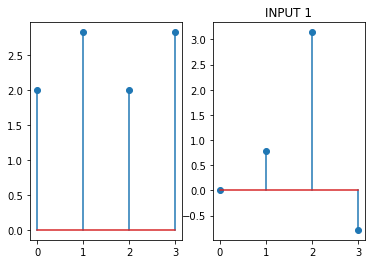

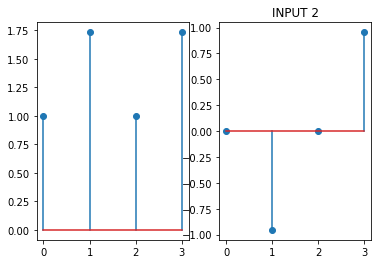

In [152]:
import numpy as np
import matplotlib.pyplot as plt

# INPUT SIGNAL
x1 = np.array([1,0,-1,2])
x2 = np.array([1, np.cos(np.pi*0.25), 0, np.cos(np.pi*0.25*3)])

def TFMat(a):
    # a is called the Dimension of the Matrix
    W = np.zeros(a*a, dtype = complex).reshape(a,a)
    for i in range(a):
        for j in range(a):
            W[i][j] = i*j*2*np.pi*(1/a)
    return np.round(np.exp(-1j*W),4)

TF = TFMat(4)

output = TF.dot(x1)
plt.subplot(1,2,1)
plt.stem(abs(output))
plt.subplot(1,2,2)
plt.stem(np.angle(output))
plt.title('INPUT 1')
plt.show()

output2 = TF.dot(x2)
plt.subplot(1,2,1)
plt.stem(abs(output2))
plt.subplot(1,2,2)
plt.stem(np.angle(output2))
plt.title('INPUT 2')
plt.show()

Q2. Compute the 8-point DFT of the following sequences. Plot the magnitude and phase spectrum. Observe the symmetry properties.
<ol>
  <li>x[n] = {1,1,0,0,0,0,0,1}</li>
  <li>x[n] = {0,1,1,0,0,0,-1,-1}</li>
  <li>x[n] = {1,1,1,1,1,1,1,1}</li>
</ol>

https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.fft.fft.html#numpy.fft.fft

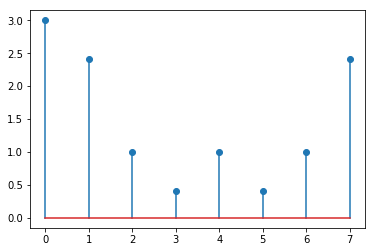

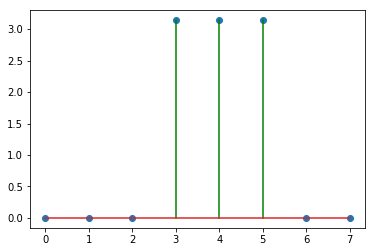

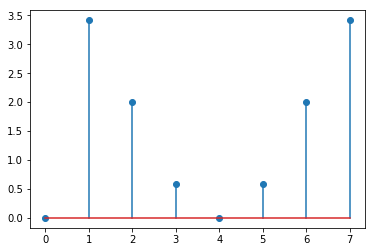

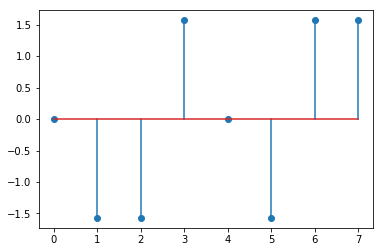

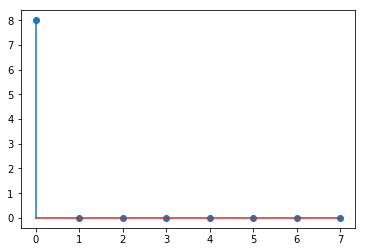

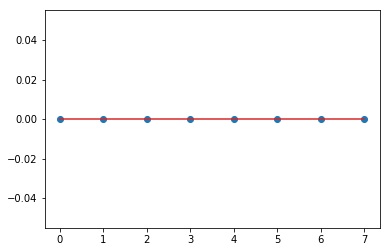

array([8.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [153]:
import numpy as np
import matplotlib.pyplot as plt

k = range(8)
a = np.array([1,1,0,0,0,0,0,1])
A = np.fft.fft(a,8)

#print(A)

plt.stem(k,abs(A))
plt.show()

angles = np.angle(A)
plt.stem(k, angles, 'g')
plt.show()

b = np.array([0,1,1,0,0,0,-1,-1])
B = TFMat(8)
output = B.dot(b)
plt.stem(abs(output))
plt.show()
plt.stem(np.angle(output))
plt.show()

c = np.array([1,1,1,1,1,1,1,1])
C = TFMat(8)
output = C.dot(c)
plt.stem(abs(output))
plt.show()
plt.stem(np.angle(output))
plt.show()

B_func = np.fft.fft(b,8)
C_func = np.fft.fft(c,8)
output

Q3. Generate the finite duration sequence $x[n] = 0.5(1-cos({\pi}n/20)), ~~0{\le}n{\lt}20$.
<ol>
  <li>Append the sequence with sufficient number of zeros to compute the DFT of the sequence with length N= 32 and 256. Plot the DFT and comment on the effects of zero padding</li>
  <li>Insert 16 zeros in the beginning of the sequence and repeat.</li>
</ol>


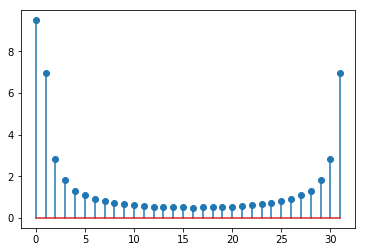

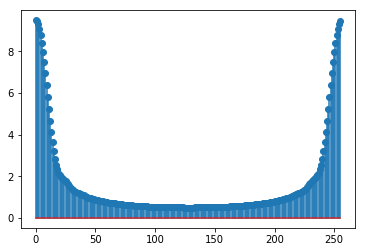

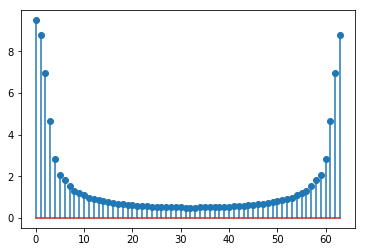

In [155]:
import numpy as np
import matplotlib.pyplot as plt

def seq(a):
    return 0.5*(1-np.cos(np.pi*a*(1/20)))

n = np.arange(0,20)
x = seq(n)
X1 = np.zeros(32)
X2 = np.zeros(256)
for i in range(len(x)):
    X1[i] = x[i]
    X2[i] = x[i]

TF1 = TFMat(32)
TF2 = TFMat(256)

out1 = TF1.dot(X1)

out2 = TF2.dot(X2)

plt.stem(abs(out1))
plt.show()
plt.stem(abs(out2))
plt.show()

X3 = np.zeros(64)
for i in range(64):
    if(i>=16 and i-16<20):
        X3[i] = x[i-16]

TF3 = TFMat(64)
out3 = TF3.dot(X3)
plt.stem(abs(out3))
plt.show()


Q4. Plot the 32-point DFT of the following signals and comment on the spectral estimate.
<ol>
  <li>$x[n] = cos(3{\pi}n/8)$</li>
  <li>$x[n] = cos(3{\pi}n/16)$</li>
  <li>$x[n] = cos(3{\pi}n/17)$</li>
</ol>

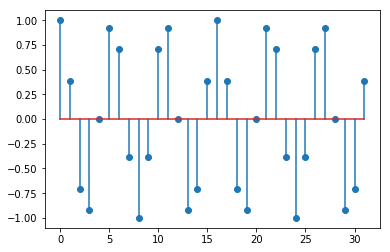

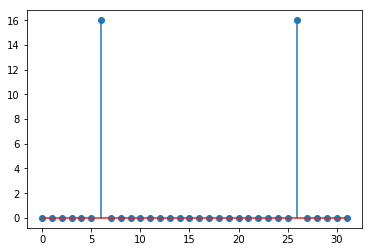

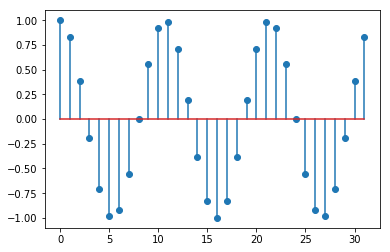

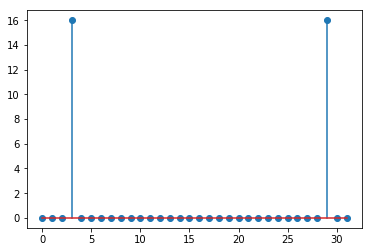

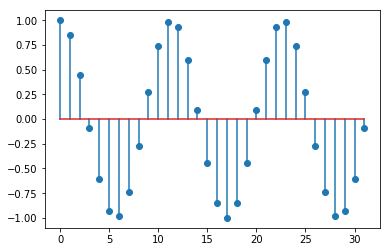

6

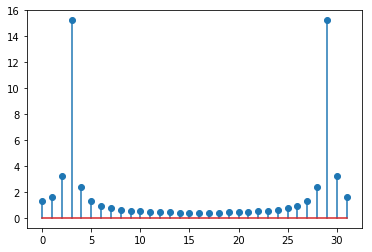

In [156]:
import numpy as np
import matplotlib.pyplot as plt

def seqq(a, b):
    return np.cos(3*(np.pi)*a*(1/b))

n = np.arange(0,32)
x1 = seqq(n, 8)
x2 = seqq(n, 16)
x3 = seqq(n, 17)

TF32 = TFMat(32)
O1 = TF32.dot(x1)
O2 = TF32.dot(x2)
O3 = TF32.dot(x3)

plt.stem(x1)

plt.show()
plt.stem(abs(O1))
plt.show()
plt.stem(x2)

plt.show()
plt.stem(abs(O2))
plt.show()
plt.stem(x3)

plt.show()
plt.stem(abs(O3))

abs(O1).argmax()

Q6. Generate the following signals $x_1[n] = cos({\pi}n/15),~~x_2[n] = cos(3{\pi}n/15)$ for n = 0 to 31. Plot the magnitude of 64 point DFT of the two signals $X_1[k]$ and $X_2[k]$ (with zero padding). Now concatenate the two signals to form a 64 length sequence $x[n]$. Plot the 64 point DFT magnitude $X[k]$ of $x[n]$. Also find the sum of two signals and plot the 64 point DFT of the result. (DFT do not give any temporal information and both results look similar)

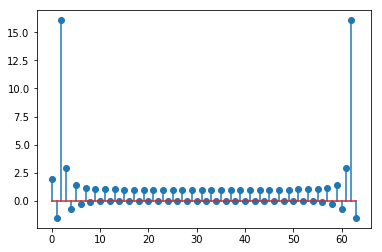

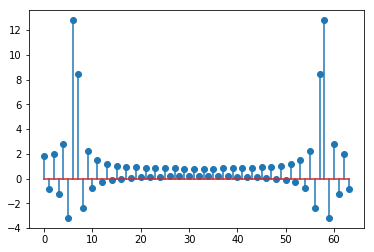

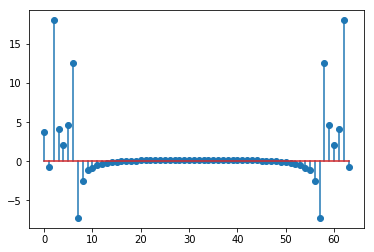

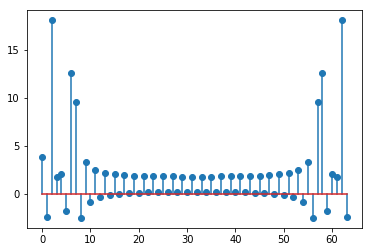

<StemContainer object of 3 artists>

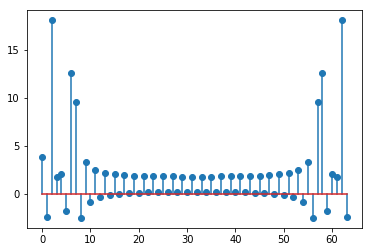

In [123]:
import numpy as np
import matplotlib.pyplot as plt

def seqqq(a, f):
    return np.cos(np.pi*a*f)

n = np.arange(32)
a1 = seqqq(n, (1/15))
a2 = seqqq(n, (3/15))

A1 = np.zeros(64)
A2 = np.zeros(64)

for i in range(32):
    A1[i] = a1[i]
    A2[i] = a2[i]

TF64 = TFMat(64)
k1 = TF64.dot(A1)
k2 = TF64.dot(A2)

plt.stem(k1)
plt.show()
plt.stem(k2)
plt.show()


A3 = np.zeros(64)
for i in range(64):
    if(i<32):
        A3[i] = a1[i]
    if(i>31):
        A3[i] = a2[i-32]

k3 = TF64.dot(A3)
plt.stem(k3)
plt.show()

a3 = a1 + a2
A4 = np.zeros(64)
for i in range(32):
    A4[i] = a3[i]
    
k4 = TF64.dot(A4)
plt.stem(k4)
plt.show()

plt.stem(k1+k2)


Q7. Estimation of signal corrupted by noise: Generate the signal $s[n] = cos({\pi}5n/32) +cos({\pi}21n/64) $ for 256 samples. Generate a noisy version of the signal x[n]  by adding white gaussian noise w[n] with variance 0.3 to the original signal s[n]. Compute the energy in the error signal $\sum_{n}^{}(x[n] - s[n])^2$ 
<ul>
  <li>Plot the 256 point DFTs $S[k]$ and $X[k]$. Find the set $S_{nz}$ of the values of $k$ for which $S[k]$ is non-zero.</li>
  <li>Find $\hat{X}[k] = X[k]$ if  $k~ \in \mathcal ~{S_{nz}}$ and zero otherwise. Find the IDFT $\hat{x}[n]$ from $\hat{X}[k]$ to recover the original signal. Plot $\hat{x}[n]$. Find the error signal energy after recovery $\sum_{n}^{}(\hat{x}[n] - s[n])^2$</li>
</ul>

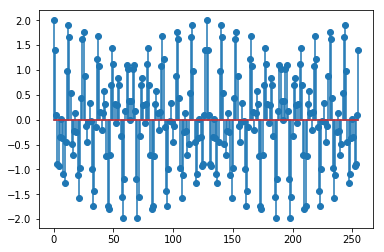

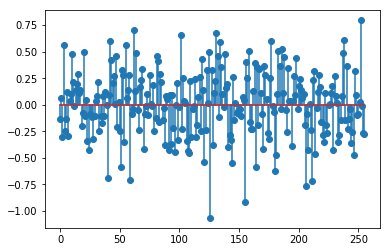

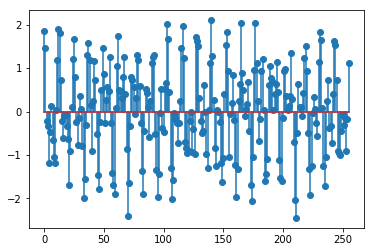

In [157]:
import numpy as np
import matplotlib.pyplot as plt

def last(a):
    return np.cos(np.pi*5*a*(1/32))+np.cos(np.pi*21*a*(1/64))

n = np.arange(256)

S = last(n)
Noise = np.random.normal(0,0.3,256)
X = S + Noise

plt.stem(n,S)
plt.show()
plt.stem(n,Noise)
plt.show()
plt.stem(n, X)
plt.show()

E = 0
for i in range(256):
    E+= (X[i]-S[i])**2

TF256 = TFMat(256)
S1 = np.round(TF256.dot(S),4)
S2 = TF256.dot(X)




In [ ]:
 plt.stem(abs(S2))
SNZ = []
for i in range(256):
    if(abs(S2[i]))>60:
        SNZ.append(i)


In [140]:
print(SNZ)
print(E)


[20, 42, 214, 236]
24.421568529443903


In [142]:
X_cap = np.zeros(256)
for i in range(256):
  if(abs(S2[i]))>60:
        X_cap[i] = S2[i]

/home/dsplab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


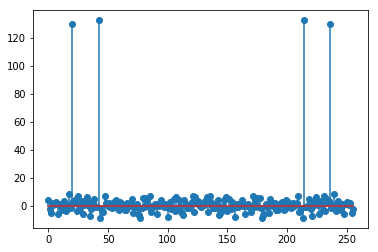

<StemContainer object of 3 artists>

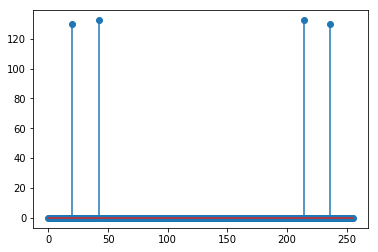

In [145]:
plt.stem(S2)
plt.show()
plt.stem(X_cap)

In [149]:
# FINDING THE IDFT
def TFInv(a):
    # a is called the Dimension of the Matrix
    W = np.zeros(a*a, dtype = complex).reshape(a,a)
    for i in range(a):
        for j in range(a):
            W[i][j] = i*j*-2*np.pi*(1/a)
    return np.round(np.exp(-1j*W),4)/a

Key = TFInv(256)
xn = Key.dot(X_cap)

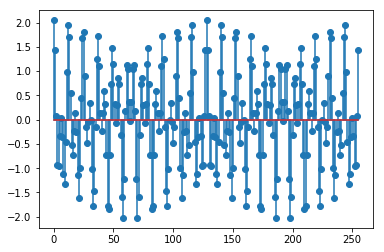

<StemContainer object of 3 artists>

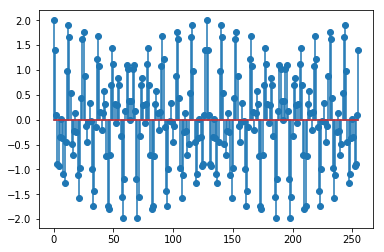

In [161]:
plt.stem(xn)
plt.show()
plt.stem(S)